In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h1> Problem Statement</h1>
The project aims to analyze job application data collected over a 3-month period, encompassing various parameters such as SR No.,CompanyName, Post, JobID, Type, Location, Skills, AppliedThrough, DateApplied,Application Status,Application Notes, Comments. The dataset consists of 555 entries.

Note: This data is exclusively collected from my personal job applications. Any external usage should include proper citation.

Last updated on: 31st OCT 2024

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
df = pd.read_csv('/content/Expanded_Job_Application_Data.csv', parse_dates=['DateApplied'], date_parser=lambda x: pd.to_datetime(x, format='%d-%m-%Y'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SR No.              555 non-null    int64         
 1   CompanyName         555 non-null    object        
 2   Post                554 non-null    object        
 3   JobID               37 non-null     object        
 4   Type                546 non-null    object        
 5   Location            551 non-null    object        
 6   Skills              531 non-null    object        
 7   AppliedThrough      553 non-null    object        
 8   DateApplied         555 non-null    datetime64[ns]
 9   Application Status  555 non-null    object        
 10  Application Notes   555 non-null    object        
 11  Comments            16 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 52.2+ KB


<ipython-input-54-a73043fdd115>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('/content/Expanded_Job_Application_Data.csv', parse_dates=['DateApplied'], date_parser=lambda x: pd.to_datetime(x, format='%d-%m-%Y'))


In [55]:
df['month'] = df['DateApplied'].dt.month
df.sample(2)

,SR No.,CompanyName,Post,JobID,Type,Location,Skills,AppliedThrough,DateApplied,Application Status,Application Notes,Comments,month
234,235,Turing,Research Analyst,NaN,Full-Time,Chennai,"TensorFlow, Machine Learning, Tableau, Statistics",Internshala,2024-02-26,Rejected,Consider other opportunities,NaN,2
67,68,S&P Global,Data Analyst,293364,Full-time,Bangalore,Databases Â· Visualization Â· Mathematics Â· A...,Offial Website & LinkedIn,2024-01-26,No Response,No response received,NaN,1


In [56]:
df.rename(columns = {'SR No.':'SeriealNumber', 'Post':'Job_Role'},inplace = True)
df.sample(2)

,SeriealNumber,CompanyName,Job_Role,JobID,Type,Location,Skills,AppliedThrough,DateApplied,Application Status,Application Notes,Comments,month
68,69,BharatX,Data Analyst,NaN,Full-time,Bangalore,"SQL, Python, Tableau, Power BI, Dashboards Â· ...",LinkedIn,2024-01-26,Rejected,Consider other opportunities,NaN,1
106,107,JioSaavn,Data Processing Analyst,NaN,Full-time,Hyderabad,"Data Analytics, Python",Naukri,2024-02-01,No Response,No response received,NaN,2


In [57]:
df.isnull().sum()

,0
SeriealNumber,0
CompanyName,0
Job_Role,1
JobID,518
Type,9
Location,4
Skills,24
AppliedThrough,2
DateApplied,0
Application Status,0


In [58]:
df.drop(['JobID','Comments'], axis=1, inplace=True, errors='ignore')
df.sample(2)

,SeriealNumber,CompanyName,Job_Role,Type,Location,Skills,AppliedThrough,DateApplied,Application Status,Application Notes,month
479,480,17live,Data Analyst,Full-Time,Delhi,"Pandas, Google Sheets, SQL",Internshala,2024-08-20,No Response,No response received,8
538,539,Creditsafe Technology,Data Analyst,Full-Time,Hyderabad,"Data Analytics, Power BI, Statistics, Machine ...",Internshala,2024-10-19,No Response,No response received,10


In [59]:
df['Job_Role'].fillna(value = df['Type'].mode()[0], inplace=True)
df['Type'].fillna(value = df['Type'].mode()[0], inplace=True)
df['Skills'].fillna(value = df['Skills'].mode()[0], inplace = True)
df['Location'].fillna(value=df['Location'].mode()[0], inplace=True)
df['AppliedThrough'].fillna(value=df['AppliedThrough'].mode()[0],inplace=True)

<ipython-input-59-bdcd4d66d5c6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Job_Role'].fillna(value = df['Type'].mode()[0], inplace=True)
<ipython-input-59-bdcd4d66d5c6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [60]:
df.isnull().sum()

,0
SeriealNumber,0
CompanyName,0
Job_Role,0
Type,0
Location,0
Skills,0
AppliedThrough,0
DateApplied,0
Application Status,0
Application Notes,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SeriealNumber       555 non-null    int64         
 1   CompanyName         555 non-null    object        
 2   Job_Role            555 non-null    object        
 3   Type                555 non-null    object        
 4   Location            555 non-null    object        
 5   Skills              555 non-null    object        
 6   AppliedThrough      555 non-null    object        
 7   DateApplied         555 non-null    datetime64[ns]
 8   Application Status  555 non-null    object        
 9   Application Notes   555 non-null    object        
 10  month               555 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(8)
memory usage: 45.7+ KB


In [62]:
df['Job_Role'] = df['Job_Role'].str.lower() # for ease of EDA
df.sample()

,SeriealNumber,CompanyName,Job_Role,Type,Location,Skills,AppliedThrough,DateApplied,Application Status,Application Notes,month
167,168,O1Labs.ai,data analyst (python),Full-Time,Bengaluru,Data Science Â· Machine Learning Â· Microsoft ...,LinkedIn,2024-02-11,No Response,No response received,2


# Exploratory Data Analysis (EDA)

<h2>Job Role</h2>

In [63]:
substrings_to_match = ['analysis', 'analyst','analytic','analytics','power bi', 'visualization','architect','mining','operations','operation','intern']
for substring in substrings_to_match:
    df.loc[df['Job_Role'].str.contains(substring),'Job_Role'] = 'Data Analyst'

df.loc[df['Job_Role'].str.contains('artificial'),'Job_Role'] = 'Artificial Inteligence'
df.loc[df['Job_Role'].str.contains('engineer'),'Job_Role'] = 'Data Engineer'

substrings_to_match = ['scientist','science']
for substring in substrings_to_match:
  df.loc[df['Job_Role'].str.contains(substring),'Job_Role'] = 'Data Science'

df['Job_Role'] = df['Job_Role'].replace(["machine learning"], 'Machine Learning')

substrings_to_match = ['development','developer','train']
for substring in substrings_to_match:
  df.loc[df['Job_Role'].str.contains(substring),'Job_Role'] = 'Software Developer'

In [64]:
df['Job_Role'].unique()

array(['Data Analyst', 'Data Science', 'Software Developer',
       'Machine Learning', 'big data associate', 'big data executive',
       'Artificial Inteligence', 'Data Engineer', 'full-time'],
      dtype=object)

In [65]:
df['Job_Role'].value_counts()

,count
Job_Role,
Data Analyst,465
Data Science,38
Software Developer,18
Data Engineer,11
Machine Learning,9
Artificial Inteligence,7
big data executive,4
big data associate,2
full-time,1


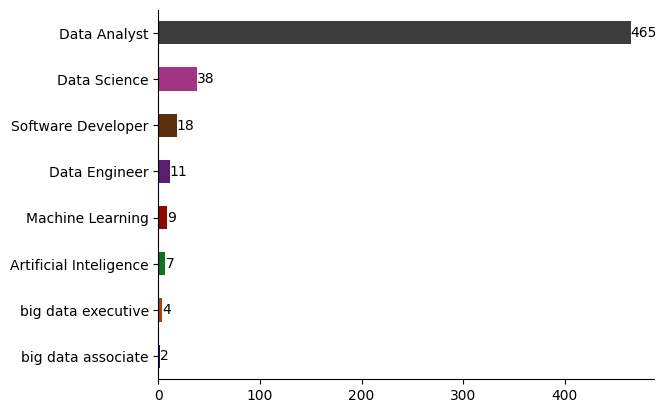

In [98]:
df = df[df['Job_Role'] != 'full-time']
ax = df.groupby('Job_Role').size().sort_values(ascending=True).plot(kind='barh', color=sns.color_palette('dark'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left',va='center', color='black',fontsize=10)
plt.show()

<h2>Job Type</h2>

In [67]:
df['Type'] = df['Type'].str.lower()
substrings_to_match = ['internship','intern','part-time']
for substring in substrings_to_match:
  df.loc[df['Type'].str.contains(substring),'Type'] = 'Internship'

df.loc[df['Type'].str.contains('full-time'),'Type'] = 'Full-Time'
df.loc[df['Type'].str.contains('contract'),'Type'] = 'Contract'

In [68]:
df['Type'].unique()

array(['Full-Time', 'Internship', 'Contract'], dtype=object)

In [69]:
df['Type'].value_counts()

,count
Type,
Full-Time,423
Internship,109
Contract,22


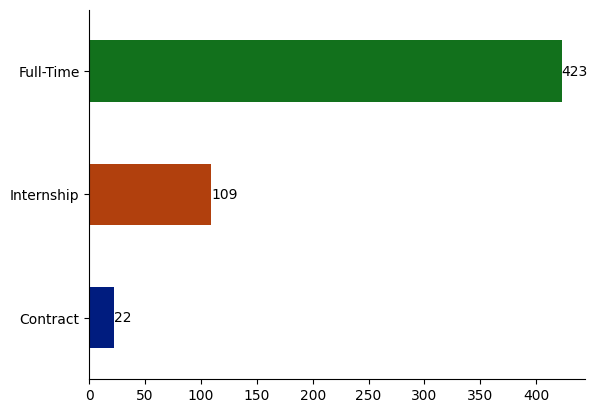

In [70]:
ax1 = df.groupby('Type').size().sort_values(ascending=True).plot(kind='barh',color=sns.color_palette('dark'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')
for p in ax1.patches:
    ax1.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left',va='center', color='black',fontsize=10)
plt.show()

<h2> Applied Through</h2>

In [71]:
df['AppliedThrough']=df['AppliedThrough'].str.lower()
df.loc[df['AppliedThrough'].str.contains('linkedin'),'AppliedThrough'] = 'LinkedIn'
df.loc[df['AppliedThrough'].str.contains('website'),'AppliedThrough'] = 'Official Website'
df.loc[df['AppliedThrough'].str.contains('naukri'),'AppliedThrough'] = 'Naukri.Com'

df['AppliedThrough'] = df['AppliedThrough'].replace(["apna.com"], 'Apna.Com')
df['AppliedThrough'] = df['AppliedThrough'].replace(["indeed"], 'Indeed')
df['AppliedThrough'] = df['AppliedThrough'].replace(["internshala"], 'Internshala')

In [72]:
df['AppliedThrough'].unique()

array(['Official Website', 'Indeed', 'Internshala', 'LinkedIn',
       'Naukri.Com', 'Apna.Com', 'hirist.tech'], dtype=object)

In [73]:
df['AppliedThrough'].value_counts()

,count
AppliedThrough,
LinkedIn,199
Official Website,96
Internshala,96
Naukri.Com,86
Indeed,73
Apna.Com,3
hirist.tech,1


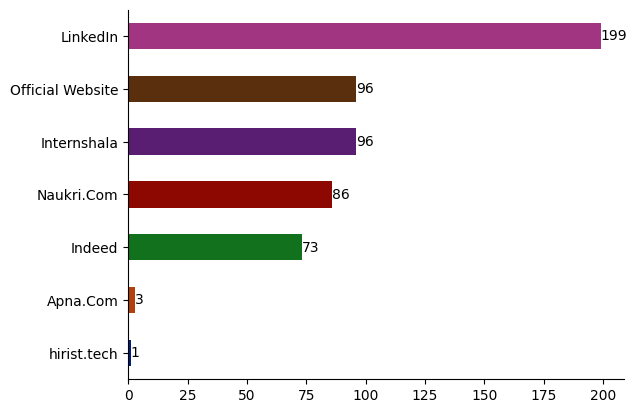

In [74]:
ax2 = df.groupby('AppliedThrough').size().sort_values(ascending=True).plot(kind='barh', color=sns.color_palette('dark'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')
for p in ax2.patches:
    ax2.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left',va='center', color='black',fontsize=10)
plt.show()

<h2>Location</h2>

In [103]:
df['Location'] = df['Location'].str.lower()

substrings_to_match = ['wfh','remote','not disclosed','work from home']
for substring in substrings_to_match:
  df.loc[df['Location'].str.contains(substring),'Location'] = 'Remote'


df.loc[df['Location'].str.contains('hyderabad'),'Location'] = 'Hyderabad'

substrings_to_match = ['bangalore','bengaluru','banglore']
for substring in substrings_to_match:
  df.loc[df['Location'].str.contains(substring),'Location'] = 'Bengaluru'

substrings_to_match = ['pune','maharathra']
for substring in substrings_to_match:
  df.loc[df['Location'].str.contains(substring),'Location'] = 'Pune'

substrings_to_match = ['noida','nd']
for substring in substrings_to_match:
  df.loc[df['Location'].str.contains(substring),'Location'] = 'Noida'

df.loc[df['Location'].str.contains('mumbai'),'Location'] = 'Mumbai'
df.loc[df['Location'].str.contains('delhi'),'Location'] = 'Delhi/NCR'
df['Location'] = df['Location'].str.upper()


In [104]:
df['Location'].unique()

array(['DELHI/NCR', 'BENGALURU', 'REMOTE', 'CHENNAI', 'MUMBAI', 'NOIDA',
       'WFM', 'HYDERABAD', 'GURUGRAM', 'PUNE', 'KOCHI'], dtype=object)

In [108]:
df['Location'].value_counts()

,count
Location,
REMOTE,148
BENGALURU,106
CHENNAI,84
HYDERABAD,65
DELHI/NCR,59
MUMBAI,55
GURUGRAM,14
NOIDA,11
PUNE,10


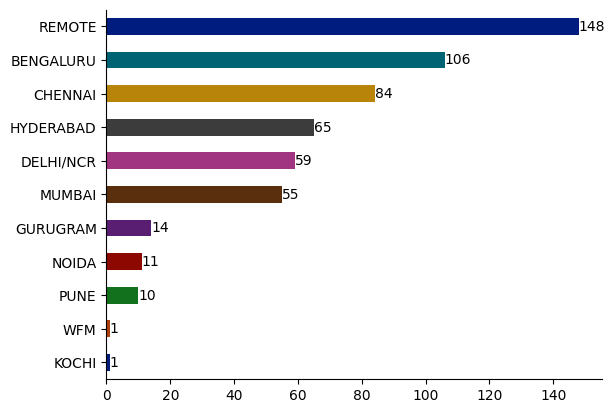

In [109]:
ax3 = df.groupby('Location').size().sort_values(ascending=True).plot(kind='barh',color=sns.color_palette('dark'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')
for p in ax3.patches:
    ax3.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left',va='center', color='black',fontsize=10)
plt.show()

<h2>Month Applied</h2>

<p>Note: Run the code only once, as the value will be replaced by the month name, causing an error if run again. To avoid this, execute the code either once or rerun the entire code from scratch.</p>

In [79]:
import calendar
df['month'] = df['month'].astype('int32')
df['month'] = df['month'].map(lambda i: calendar.month_name[i]) # Replacing with month name

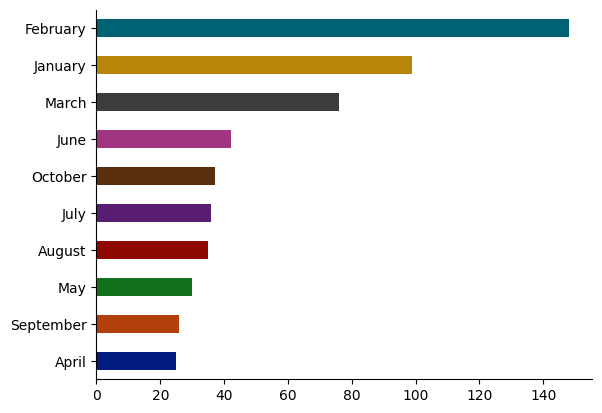

In [80]:
ax4 = df.groupby('month').size().sort_values(ascending=True).plot(kind='barh',color=sns.color_palette('dark'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')
for p in ax3.patches:
    ax3.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left',va='center', color='black',fontsize=10)
plt.show()

<h2>Job Role - Type</h2>

In [81]:
df['Job_Role'].unique()

array(['Data Analyst', 'Data Science', 'Software Developer',
       'Machine Learning', 'big data associate', 'big data executive',
       'Artificial Inteligence', 'Data Engineer'], dtype=object)

In [82]:
df['Job_Role'].value_counts()

,count
Job_Role,
Data Analyst,465
Data Science,38
Software Developer,18
Data Engineer,11
Machine Learning,9
Artificial Inteligence,7
big data executive,4
big data associate,2


In [83]:
top_jobs = df['Job_Role'].value_counts().nlargest(5).index
filtered_df = df[df['Job_Role'].isin(top_jobs)]

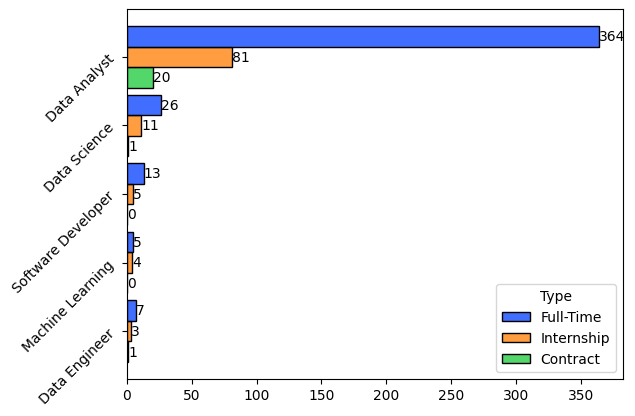

In [84]:
ax4 = sns.histplot(data=filtered_df, y='Job_Role', hue='Type', multiple='dodge', shrink=0.9, palette='bright')
plt.yticks(rotation=45, ha='right')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')
for p in ax4.patches:
    ax4.annotate(f'{p.get_width()}',
                 (p.get_width(), p.get_y() + p.get_height() / 2),
                 ha='left', va='center', color='black', fontsize=10)
plt.show()

<h2>Job Role - Applied Through</h2>

In [85]:
top_app = df['Job_Role'].value_counts().nlargest(3).index
filtered_df1 = df[df['Job_Role'].isin(top_app)]

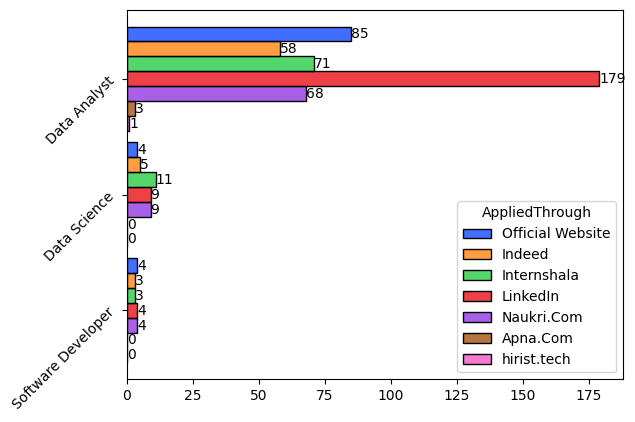

In [86]:
ax5 = sns.histplot(data=filtered_df1, y='Job_Role', hue='AppliedThrough', multiple='dodge', shrink=.9, palette='bright')
plt.yticks(rotation=45, ha='right')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')
for p in ax5.patches:
    ax5.annotate(f'{p.get_width()}',
                 (p.get_width(), p.get_y() + p.get_height() / 2),
                 ha='left', va='center', color='black', fontsize=10)
plt.show()

<h2> Job Role - Location</h2>

In [87]:
top_loc = df['Job_Role'].value_counts().nlargest(3).index
filtered_df2 = df[df['Job_Role'].isin(top_loc)]

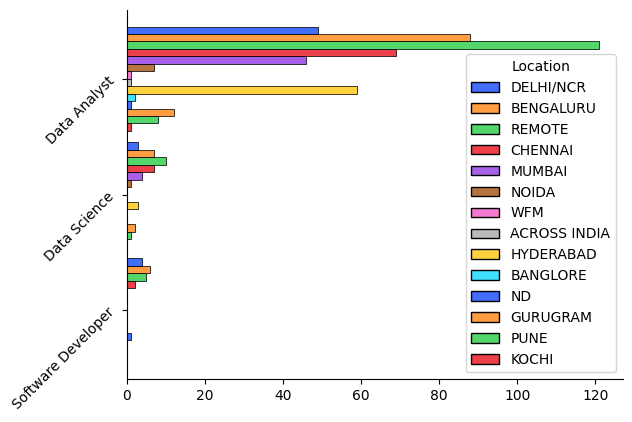

In [88]:
ax6 = sns.histplot(data=filtered_df2, y='Job_Role', hue='Location', multiple='dodge', shrink=.9, palette='bright')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.yticks(rotation=45, ha='right')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')
# for p in ax6.patches:
#     ax6.annotate(f'{p.get_width()}',
#                  (p.get_width(), p.get_y() + p.get_height() / 2),
#                  ha='left', va='center', color='black', fontsize=10)
plt.show()

<h2>Job Role - Month Applied on</h2>

In [89]:
top_mon = df['Job_Role'].value_counts().nlargest(3).index
filtered_df3 = df[df['Job_Role'].isin(top_loc)]

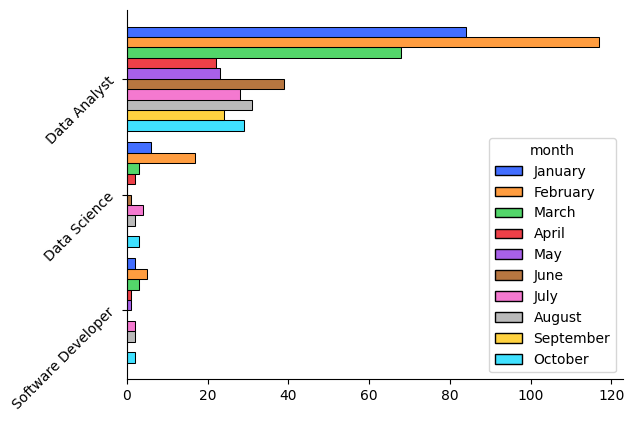

In [90]:
ax7 = sns.histplot(data=filtered_df3, y='Job_Role', hue='month', multiple='dodge', shrink=.9, palette='bright')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.yticks(rotation=45, ha='right')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')
# for p in ax6.patches:
#     ax7.annotate(f'{p.get_width()}',
#                  (p.get_width(), p.get_y() + p.get_height() / 2),
#                  ha='left', va='center', color='black', fontsize=10)
plt.show()

<h1>Important Parameters Analysis:</h1>

<h2>Top 5 applied companies</h2>

In [91]:
df['CompanyName'].value_counts().head()

,count
CompanyName,
Innometrics Solutions,15
Rekruton Technologies,13
Ozibook Tech Solutions Private Limited,11
BayOne Solutions,9
LatentView,8


<h2>Most applied Job Role</h2>

In [92]:
df['Job_Role'].value_counts().head(5)

,count
Job_Role,
Data Analyst,465
Data Science,38
Software Developer,18
Data Engineer,11
Machine Learning,9


<h2>Top 5 Job Location</h2>

In [93]:
df['Location'].value_counts().head(5)

,count
Location,
REMOTE,148
BENGALURU,104
CHENNAI,84
HYDERABAD,65
DELHI/NCR,59


<h2>Most Applied Job Type</h2>

In [94]:
df['Type'].value_counts().head(1)

,count
Type,
Full-Time,423


<h2>Most Job Applied in Month of- </h2>

In [95]:
df['month'].value_counts().head(1)

,count
month,
February,148


<h2>Top 3 plateform job applied through?</h2>

In [96]:
df['AppliedThrough'].value_counts().head(3)

,count
AppliedThrough,
LinkedIn,199
Official Website,96
Internshala,96
